In [132]:
import pandas as pd
df = pd.DataFrame([eval(l) for l in open("../logs/logs_qa_v2.jsonl").readlines()])
df

,model,dateset,measure_type,metric,value,timestamp
0,models/t5-large-squad,squad,perf,exact_match,86.111637,23-01-2025 16:46
1,models/t5-large-squad,squad,perf,f1,93.231154,23-01-2025 16:46
2,deepset/roberta-base-squad2,squad,perf,exact_match,85.250710,23-01-2025 16:51
3,deepset/roberta-base-squad2,squad,perf,f1,91.816176,23-01-2025 16:51
4,deepset/roberta-base-squad2-distilled,squad,perf,exact_match,86.187323,23-01-2025 16:56
...,...,...,...,...,...,...
145,models/roberta-large-orig,triviaqa,perf,f1,55.305306,22-01-2025 18:22
146,models/roberta-large-orig,nq,perf,exact_match,58.361630,22-01-2025 18:25
147,models/roberta-large-orig,nq,perf,f1,73.043613,22-01-2025 18:25
148,models/roberta-large-orig,adversarial_qa,perf,exact_match,33.800000,22-01-2025 18:30


In [133]:
df[df["metric"] == "exact_match"][["model", "measure_type", "value"]]

,model,measure_type,value
0,models/t5-large-squad,perf,86.111637
2,deepset/roberta-base-squad2,perf,85.250710
4,deepset/roberta-base-squad2-distilled,perf,86.187323
6,ahotrod/electra_large_discriminator_squad2_512,perf,89.252602
8,deepset/xlm-roberta-large-squad2,perf,84.664144
...,...,...,...
142,models/roberta-large-orig,shortcut-max_sim_ents,1.118750
143,models/roberta-large-orig,shortcut-answer_subject_positions,-1.000000
144,models/roberta-large-orig,perf,45.216065
146,models/roberta-large-orig,perf,58.361630


In [134]:
df = df[df["metric"] == "exact_match"]

In [135]:
df = df.apply(lambda row: row if "shortcut" not in row["measure_type"] else {k: (v if k!="value" 
																			else v/df[(df["dateset"] == row["dateset"]) & (df["model"] == row["model"])]["value"].iloc[0]*100) 
																		for k, v in row.items()}, axis=1)

In [136]:
df["value"] = df["value"].apply(lambda x: x if x > 0 else 0)
df

,model,dateset,measure_type,metric,value,timestamp
0,models/t5-large-squad,squad,perf,exact_match,86.111637,23-01-2025 16:46
2,deepset/roberta-base-squad2,squad,perf,exact_match,85.250710,23-01-2025 16:51
4,deepset/roberta-base-squad2-distilled,squad,perf,exact_match,86.187323,23-01-2025 16:56
6,ahotrod/electra_large_discriminator_squad2_512,squad,perf,exact_match,89.252602,23-01-2025 17:12
8,deepset/xlm-roberta-large-squad2,squad,perf,exact_match,84.664144,23-01-2025 17:27
...,...,...,...,...,...,...
142,models/roberta-large-orig,squad,shortcut-max_sim_ents,exact_match,1.273168,22-01-2025 17:20
143,models/roberta-large-orig,squad,shortcut-answer_subject_positions,exact_match,0.000000,22-01-2025 17:24
144,models/roberta-large-orig,triviaqa,perf,exact_match,45.216065,22-01-2025 18:22
146,models/roberta-large-orig,nq,perf,exact_match,58.361630,22-01-2025 18:25


In [137]:
df = df.set_index("model", drop=True)
df

,dateset,measure_type,metric,value,timestamp
model,,,,,
models/t5-large-squad,squad,perf,exact_match,86.111637,23-01-2025 16:46
deepset/roberta-base-squad2,squad,perf,exact_match,85.250710,23-01-2025 16:51
deepset/roberta-base-squad2-distilled,squad,perf,exact_match,86.187323,23-01-2025 16:56
ahotrod/electra_large_discriminator_squad2_512,squad,perf,exact_match,89.252602,23-01-2025 17:12
deepset/xlm-roberta-large-squad2,squad,perf,exact_match,84.664144,23-01-2025 17:27
...,...,...,...,...,...
models/roberta-large-orig,squad,shortcut-max_sim_ents,exact_match,1.273168,22-01-2025 17:20
models/roberta-large-orig,squad,shortcut-answer_subject_positions,exact_match,0.000000,22-01-2025 17:24
models/roberta-large-orig,triviaqa,perf,exact_match,45.216065,22-01-2025 18:22


In [198]:
df_ranks = pd.DataFrame()
ood_datasets = ["squad", "triviaqa", "nq", "adversarial_qa"]
# shortcuts = ["similar_words", "distances", "kth_sentence", "cosine_similarity", "answer_length", "max_sim_ents", "answer_subject_positions"]
shortcuts = ["similar_words", "distances", "cosine_similarity", "answer_length", "max_sim_ents"]

ood_keys = []
for ood_dataset in ood_datasets:
	k = "%s_rank" % ood_dataset
	df_ranks[k] = df[(df["dateset"] == ood_dataset) & (df['measure_type'] == "perf")].rank(ascending=False)["value"]
	ood_keys.append(k)
df_ranks["datasets_avg"] = df_ranks[ood_keys].mean(axis=1).rank(ascending=True)

shortcut_keys = []
for shortcut in shortcuts:
	k = "%s_rank" % shortcut
	df_ranks[k] = df[df["measure_type"] == "shortcut-%s" % shortcut].rank(ascending=True)["value"]
	shortcut_keys.append(k)
df_ranks["shortcuts_avg"] = df_ranks[shortcut_keys].mean(axis=1).rank(ascending=True)

<Axes: ylabel='model'>

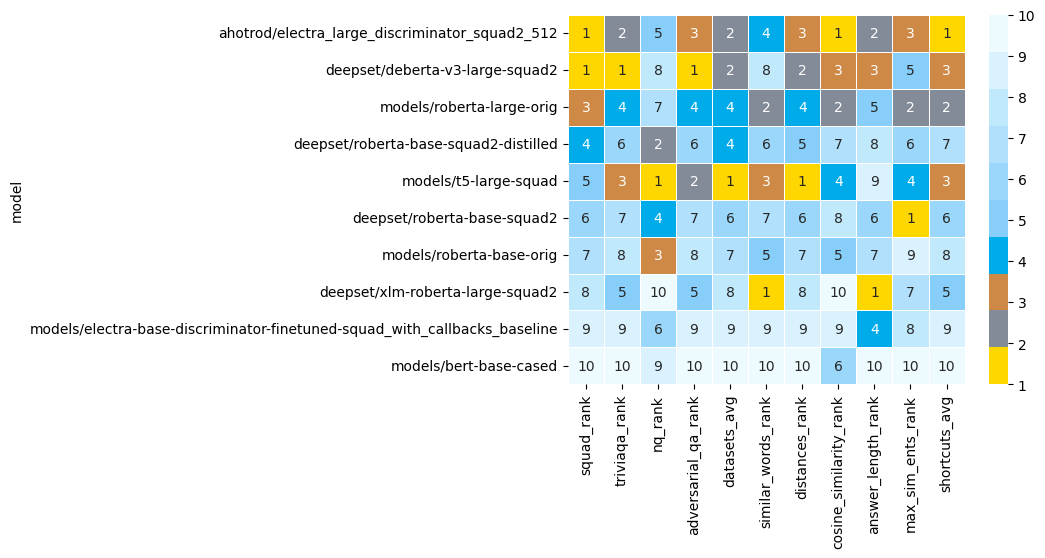

In [200]:
import seaborn as sns
from matplotlib.colors import ListedColormap
import math

custom_palette = ["#FFD700", "#848B98", '#CE8946', '#00ABEA', '#87CEFA', '#9BD7FB', '#B0E0FC', '#C1E9FC', '#D9F2FE', '#EDFBFF']
cmap = ListedColormap(custom_palette)

sns.heatmap(df_ranks.sort_values(by="squad_rank").applymap(math.floor), annot=True, cmap=cmap, linewidths=0.5)

In [169]:
print(list(reversed(["#EDFBFF", "#D9F2FE", "#C1E9FC", "#B0E0FC", "#9BD7FB", "#87CEFA", "#00ABEA", "#034EEE"])))

['#034EEE', '#00ABEA', '#87CEFA', '#9BD7FB', '#B0E0FC', '#C1E9FC', '#D9F2FE', '#EDFBFF']


<Axes: >

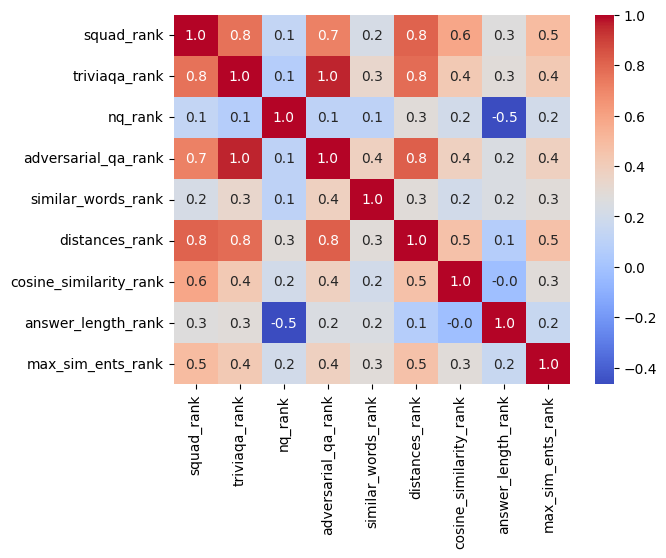

In [143]:
import seaborn as sns
# sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(df_ranks.corr(method="kendall"), annot=True, cmap="coolwarm", fmt=".1f")

<Axes: >

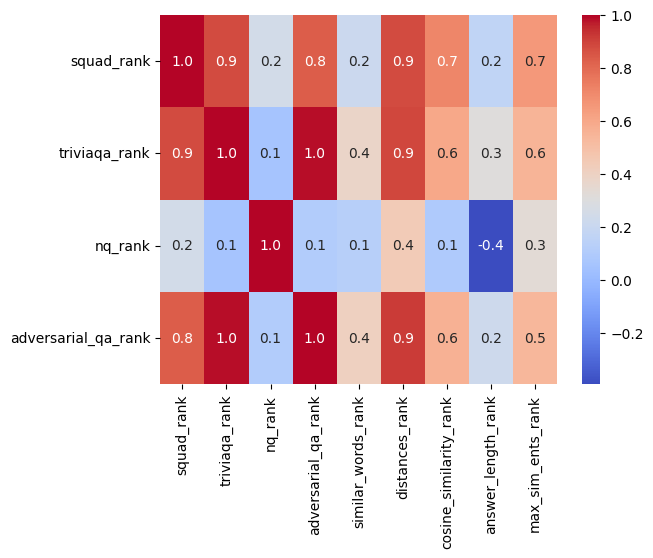

In [105]:
import seaborn as sns
sns.heatmap(df_ranks.corr(method="spearman")[["squad_rank", "triviaqa_rank", "nq_rank", "adversarial_qa_rank"]].T, annot=True, cmap="coolwarm", fmt=".1f")

In [149]:
print(sns.color_palette("light:b_r").as_hex())

['#0000ff', '#3030fd', '#6060fa', '#9090f8', '#c0c0f5', '#f0f0f3']


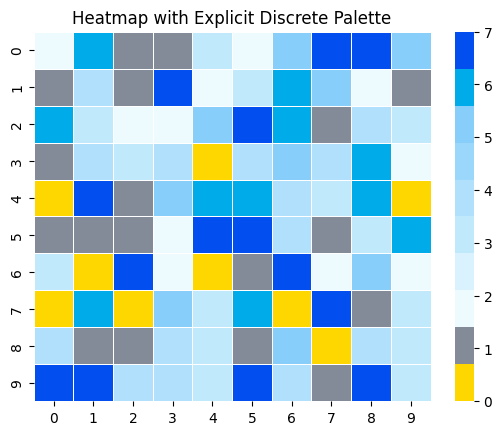

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Create a sample dataset with discrete values
data = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], size=(10, 10))

# Define explicit mapping of values to colors
custom_palette = ["#FFD700", "#848B98", "#EDFBFF", "#D9F2FE", "#C1E9FC", "#B0E0FC", "#9BD7FB", "#87CEFA", "#00ABEA", "#034EEE"]
cmap = ListedColormap(custom_palette)

# Plot the heatmap
sns.heatmap(data, cmap=cmap, linewidths=0.5, cbar=True)

plt.title("Heatmap with Explicit Discrete Palette")
plt.show()
